In [15]:
import cv2
import numpy as np

In [4]:
ls -alt

total 32
drwxr-xr-x  6 epicgilco  admin   192 Jun  3 14:25 ./
-rw-r--r--  1 epicgilco  admin  1120 Jun  3 14:25 Untitled.ipynb
drwxr-xr-x  3 epicgilco  admin    96 Jun  3 14:21 .ipynb_checkpoints/
-rw-r--r--  1 epicgilco  admin  5501 Jun  3 14:18 Numpy_and_img-processing.ipynb
drwxr-xr-x  5 epicgilco  admin   160 Jun  3 14:18 ../
-rw-r--r--@ 1 epicgilco  admin   189 Jun  3 14:16 smallgray.png


In [7]:
im_g = cv2.imread("smallgray.png", 0) # also need to pass in 0 or 1. 0 = greyscale, 1 = BGR (blue green red)
im_g

array([[187, 158, 104, 121, 143],
       [198, 125, 255, 255, 147],
       [209, 134, 255,  97, 182]], dtype=uint8)

In [13]:
from IPython import display
display.Image("./smallgray.png")
# works

In [17]:
im_g2 = im_g
im_g2 = np.where(im_g2==255, 1, im_g2)
im_g2

array([[187, 158, 104, 121, 143],
       [198, 125,   1,   1, 147],
       [209, 134,   1,  97, 182]], dtype=uint8)

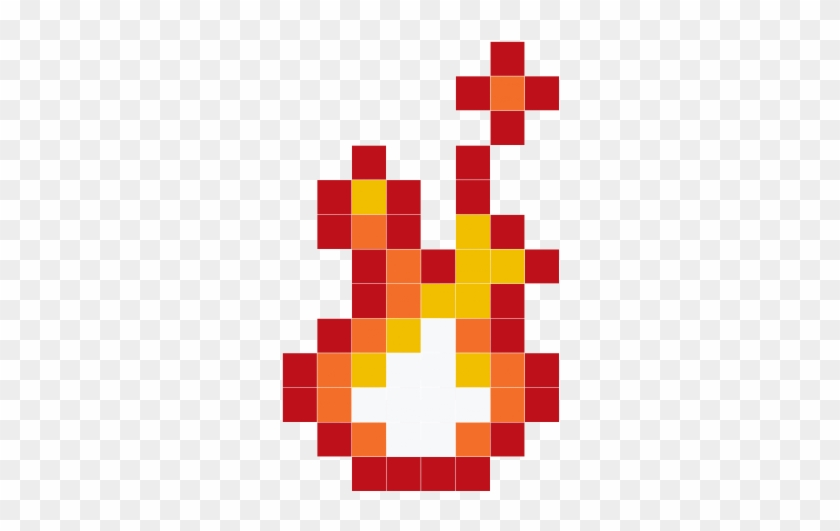

In [19]:
display.Image("./pixel-art-fire.png")

In [26]:
# use cv2.imwrite("new-file-name.filetype", np.ndarray-to-convert-to-img) to turn a ndarray into an image file
fire = cv2.imread("pixel-art-fire.png", 0)
cv2.imwrite("greyfire.png", fire)

True

In [28]:
'''
return2color = cv2.imread("greyfire.png", 1)
cv2.imwrite("recoloredfire.png", return2color)
# cant return it to color normally. good to know~
'''

'\nreturn2color = cv2.imread("greyfire.png", 1)\ncv2.imwrite("recoloredfire.png", return2color)\n# cant return it to color normally. good to know~\n'

In [29]:
darkfire = np.where(fire <= 125, 1, fire) # if an indicie is <= 125 instead make it black
cv2.imwrite("darkfire.png", darkfire)

True

In [31]:
# further playing with the colors
darkfire = np.where(darkfire > 125, 150, darkfire)
cv2.imwrite("darkfire2.png", darkfire)

True

In [32]:
# LESSON - slicing, indexing, iterating np arrays

In [35]:
# standard py arrays
a = [1,2,3]
a[0:2]

[1, 2]

In [36]:
im_g

array([[187, 158, 104, 121, 143],
       [198, 125, 255, 255, 147],
       [209, 134, 255,  97, 182]], dtype=uint8)

In [37]:
# for ndarrays:
# ndarray[row, column, depth]
'''
im_g = [187, 158, 104, 121, 143],
       [198, 125, 255, 255, 147],
       [209, 134, 255,  97, 182]''' 
# so lets say you wanted the first 2 rows, and only the 3rd and 4th column (dont forget, counting from zero).
# you would type this -> im_g [0:2, 2:4] to yield [104,121][255,255]

'\nim_g = [187, 158, 104, 121, 143],\n       [198, 125, 255, 255, 147],\n       [209, 134, 255,  97, 182]\n'

In [38]:
im_g[0:2,2:4]

array([[104, 121],
       [255, 255]], dtype=uint8)

In [41]:
im_g.shape

(3, 5)

In [48]:
'''sample = np.zeros((3,3,3))
y = 0
for x in np.nditer(sample):
    print(y)
    y = y+1
sample'''

'sample = np.zeros((3,3,3))\ny = 0\nfor x in np.nditer(sample):\n    print(y)\n    y = y+1\nsample'

In [52]:
for i in im_g:
    print(i) # will print out each row in ndarray
    
# IMPORTANT: AND IF YOU WANT TO ITERATE THE COLUMNS/ACCESS BY COLUMNS:
for i in im_g.T: # Dont forget .T is transpose!
    print(i)
    
# IMPORTANT: Finally if you just want to iterate value by value, irrespective of row & col. use .flat
for i in im_g.flat: # Dont forget .flat makes n-dimensional arrays, 1d
    print(i)

[187 158 104 121 143]
[198 125 255 255 147]
[209 134 255  97 182]
[187 198 209]
[158 125 134]
[104 255 255]
[121 255  97]
[143 147 182]
187
158
104
121
143
198
125
255
255
147
209
134
255
97
182


In [53]:
# LESSON: Stacking and splitting np arrays

In [65]:
ims = np.hstack((im_g,im_g,im_g)) # hstack expects you to pass in two or more ndarrays, BUT you MUST pass them in as a tuple.

In [63]:
ims

array([[187, 158, 104, 121, 143, 187, 158, 104, 121, 143, 187, 158, 104,
        121, 143],
       [198, 125, 255, 255, 147, 198, 125, 255, 255, 147, 198, 125, 255,
        255, 147],
       [209, 134, 255,  97, 182, 209, 134, 255,  97, 182, 209, 134, 255,
         97, 182]], dtype=uint8)

In [69]:
imsVert = np.vstack((im_g,im_g,im_g)) # vstack is identical to hstack, except it stacks ndarrays VERTICALLY

In [70]:
print(imsVert)

[[187 158 104 121 143]
 [198 125 255 255 147]
 [209 134 255  97 182]
 [187 158 104 121 143]
 [198 125 255 255 147]
 [209 134 255  97 182]
 [187 158 104 121 143]
 [198 125 255 255 147]
 [209 134 255  97 182]]


In [71]:
# please note! if you try to concatenate ndarrays with different dimensions, you will get an error

In [83]:
# now for splitting ndarrays into smaller ones
# pass in an ndarray and an integer (how many you want the indicated array to be broken down into)
# BEWARE! you must choose an in that will result in an EVEN split for each new ndarray otherwise you'll get an error
lst = np.hsplit(ims,5)
print(lst)

[array([[187, 158, 104],
       [198, 125, 255],
       [209, 134, 255]], dtype=uint8), array([[121, 143, 187],
       [255, 147, 198],
       [ 97, 182, 209]], dtype=uint8), array([[158, 104, 121],
       [125, 255, 255],
       [134, 255,  97]], dtype=uint8), array([[143, 187, 158],
       [147, 198, 125],
       [182, 209, 134]], dtype=uint8), array([[104, 121, 143],
       [255, 255, 147],
       [255,  97, 182]], dtype=uint8)]


In [84]:
lst = np.vsplit(ims,3)
print(lst)

[array([[187, 158, 104, 121, 143, 187, 158, 104, 121, 143, 187, 158, 104,
        121, 143]], dtype=uint8), array([[198, 125, 255, 255, 147, 198, 125, 255, 255, 147, 198, 125, 255,
        255, 147]], dtype=uint8), array([[209, 134, 255,  97, 182, 209, 134, 255,  97, 182, 209, 134, 255,
         97, 182]], dtype=uint8)]
